# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the data into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [6]:
def principalComponentAnalysis(X, num_of_components):
    # mean face: calculate mean values of all image matrices
    mean_face = np.mean(X, axis=0)
    
    # subtract mean face from each face image and reshape to 2D array
    X_centered = (X - mean_face)
    X_centered = X_centered.reshape(trainFaces.shape[0], -1)
    
    # covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)
    
    # eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # sorting the eigenvalues and eigenvectors in descending order
    index = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, index]

    eigen_faces = eigenvectors[:, :num_of_components] # top num_of_components as eigen_faces
    
    return eigen_faces

In [7]:
n = 100

principal_components = principalComponentAnalysis(trainFaces, n)
print(principal_components.shape)

(10304, 100)


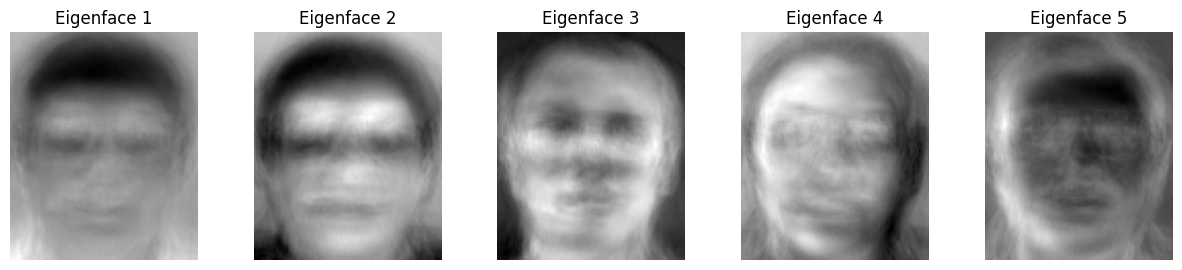

In [8]:
# plot the eigen faces
%matplotlib inline

def plot_eigenfaces(principal_components):
    num_cols = 5
    num_rows = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(principal_components[:, i].reshape(112, 92), cmap='gray')
        ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')
    
    plt.show()

plot_eigenfaces(principal_components)

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [9]:
def imageReconstruction(testFace, eigenFaces, meanFace, num_of_components):
    """
    Helper function to reconstruct images
    """
    
    # eigen projections / coefficients
    eigen_projections = np.dot((testFace - meanFace).flatten(), eigenFaces[:, :num_of_components])
    
    # image reconstruction using the eigen projections and eigenfaces
    reconstructed_image = meanFace.flatten() + np.dot(eigen_projections, eigenFaces[:, :num_of_components].T)
    
    # reshape image to its original dimensions
    reconstructed_image = reconstructed_image.reshape(testFace.shape)
    
    return reconstructed_image

In [10]:
# mean face
mean_face = np.mean(trainFaces, axis=0)

In [11]:
# plot recontructions here

def plot_reconstructions(testFace, reconstructed_images, num_of_components):
    
    plt.figure(figsize=(10, 4))
    
    # original test face
    plt.subplot(1, len(reconstructed_images) + 1, 1)
    plt.imshow(testFace.reshape(112, 92), cmap='gray')
    plt.title('Original Test Face')
    plt.axis('off')
    
    # reconstructed images for different number of pc
    for i, reconstructed_image in enumerate(reconstructed_images):
        plt.subplot(1, len(reconstructed_images) + 1, i + 2)
        plt.imshow(reconstructed_image.reshape(112, 92), cmap='gray')
        plt.title(f'n = {num_of_components}')
        plt.axis('off')
    
    plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

In [16]:
def displayNfactors(n):
    
    # n = num_of_components

    reconstructed_images = [imageReconstruction(testFaces[0], principal_components, mean_face, n)]
    plot_reconstructions(testFaces[0], reconstructed_images, n)

    return None

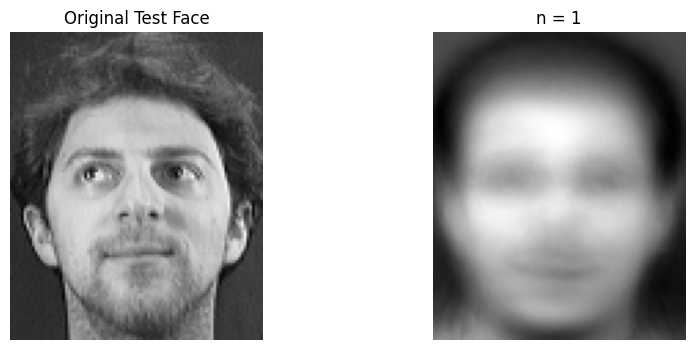

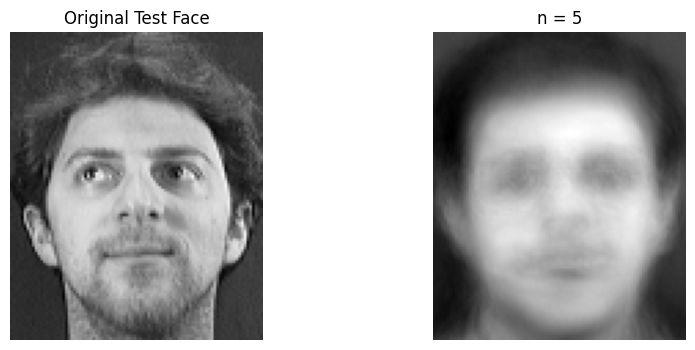

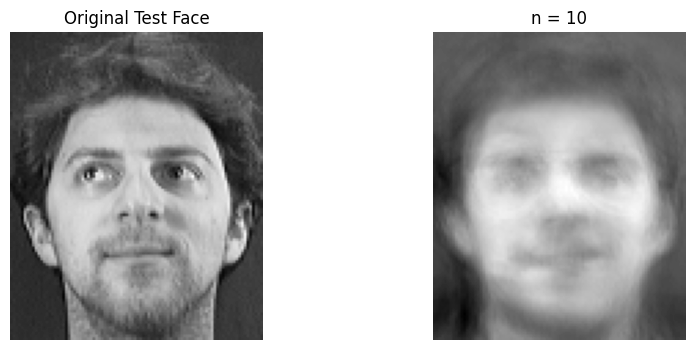

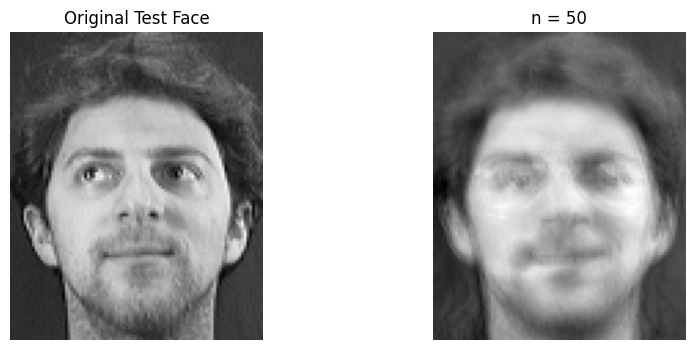

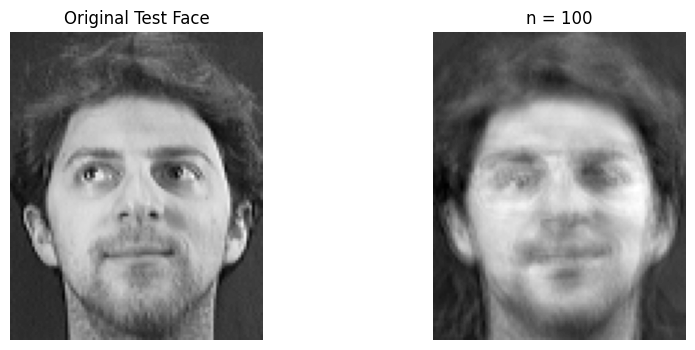

In [17]:
num_components_list = [1, 5, 10, 50, 100]

for n in num_components_list:
    displayNfactors(n)

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [18]:
def getClass(test_image, eigenFaces, mean_face, X_train, Y_train):
    
    test_image_flat = (test_image - mean_face).flatten()
    projected_test_face = np.dot(eigenFaces.T, test_image_flat)

    # test image reconstruction
    reconstructed_face = mean_face.flatten() + np.dot(projected_test_face, eigenFaces.T)

    min_error = np.inf
    predicted_class = None
    best_reconstructed_face = None

    # comparing th test image with the training set
    for i in range(len(X_train)):
        # training image projection onto the PCA space
        train_image = (X_train[i] - mean_face).flatten()
        projected_train_face = np.dot(eigenFaces.T, train_image)

        # reconstruction error
        error = np.linalg.norm(projected_test_face - projected_train_face)

        # update values of min_err and the predicted_class
        if error < min_error:
            min_error = error
            predicted_class = Y_train[i]
            best_reconstructed_face = np.dot(eigenFaces, projected_test_face) + mean_face.flatten()

    return best_reconstructed_face, min_error, predicted_class

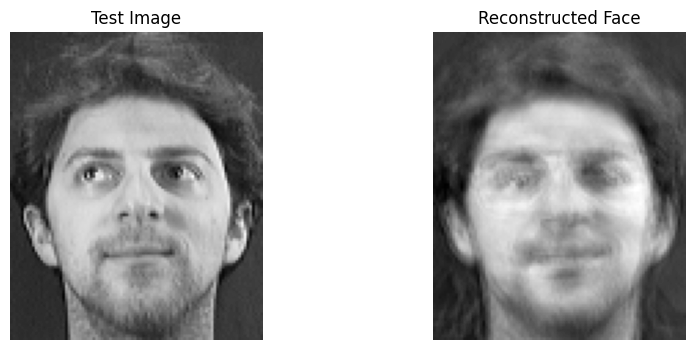

Min Error: 1445.198523899969
Predicted Class: 7


In [19]:
test_face_index = 0
best_reconstructed_face, min_error, predicted_class = getClass(testFaces[test_face_index], principal_components[:,:200], mean_face, trainFaces, trainLabels)

# results
# original
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(testFaces[test_face_index], cmap='gray')
plt.title('Test Image')
plt.axis('off')

plt.subplot(1, 2, 2)

# reconstructed
reshaped_reconstructed_face = best_reconstructed_face.reshape(testFaces[0].shape)
plt.imshow(reshaped_reconstructed_face, cmap='gray')
plt.title('Reconstructed Face')
plt.axis('off')

plt.show()

print(f"Min Error: {min_error}")
print(f"Predicted Class: {predicted_class}")

Iterate through all the images in the test data and test the accuracy by taking different number of components

In [20]:
from sklearn.metrics import accuracy_score

components = [3,5,10,20,30,40,50]
mse = []

for numComponents in components:

    eigenFaces = principal_components[:, :numComponents]
    errors = []

    # MSE for each test image
    for i in range(len(testFaces)):
        reconstructed_face, _, _ = getClass(testFaces[i], eigenFaces, mean_face, trainFaces, trainLabels)
        error = np.mean((reconstructed_face - testFaces[i].flatten()).flatten() ** 2)
        errors.append(error)

    # MSE for the current number of components
    mean_square_error = np.mean(errors)
    mse.append(mean_square_error)

    # accuracy ffor the current number of components
    predictions = []
    for i in range(len(testFaces)):
        _, _, predicted_class = getClass(testFaces[i], eigenFaces, mean_face, trainFaces, trainLabels)
        predictions.append(predicted_class)
    accuracy = accuracy_score(testLabels, predictions)

    # log MSE
    log_mean_square_error = np.mean(np.log(1 + np.array(errors)))

    print(f"Number of PC: {numComponents}")
    print(f"MSE: {mean_square_error}")
    print(f"Logarithmic MSE: {log_mean_square_error}")
    print(f"Accuracy: {accuracy}")
    print("\n")

Number of PC: 3
MSE: 1047.4515538213923
Logarithmic MSE: 6.917007533942558
Accuracy: 0.625


Number of PC: 5
MSE: 852.4524799143834
Logarithmic MSE: 6.719178137171245
Accuracy: 0.825


Number of PC: 10
MSE: 676.0430357665742
Logarithmic MSE: 6.48998026517973
Accuracy: 0.925


Number of PC: 20
MSE: 538.1114716166322
Logarithmic MSE: 6.262326399608417
Accuracy: 0.975


Number of PC: 30
MSE: 471.4902256557107
Logarithmic MSE: 6.129877169485402
Accuracy: 1.0


Number of PC: 40
MSE: 428.57035033853197
Logarithmic MSE: 6.034313953839204
Accuracy: 1.0


Number of PC: 50
MSE: 398.0238315964258
Logarithmic MSE: 5.961078968895491
Accuracy: 1.0




Plot Number of eigenvectors vs Mean Square Error

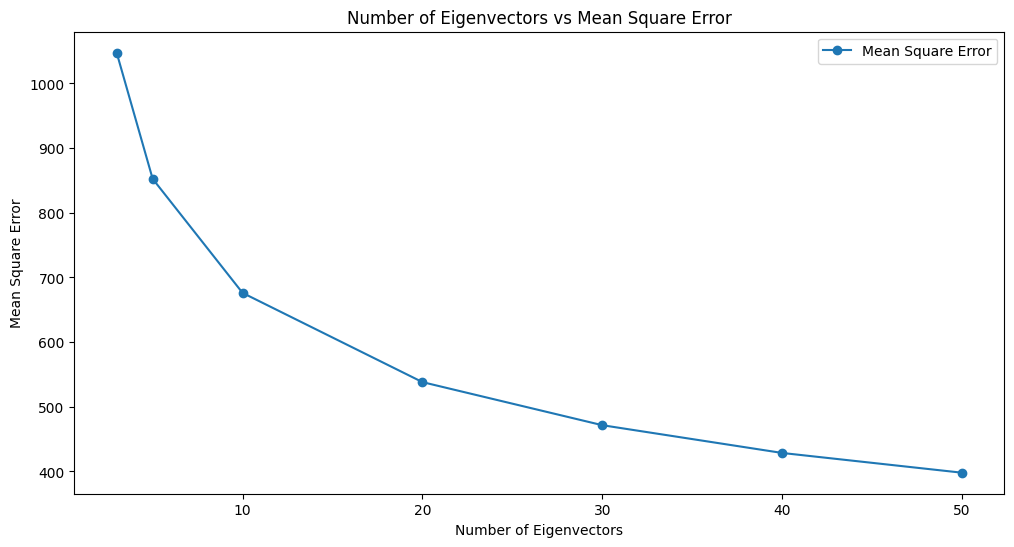

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(components, mse, marker='o', label='Mean Square Error')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Mean Square Error')
plt.title('Number of Eigenvectors vs Mean Square Error')
plt.legend()
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

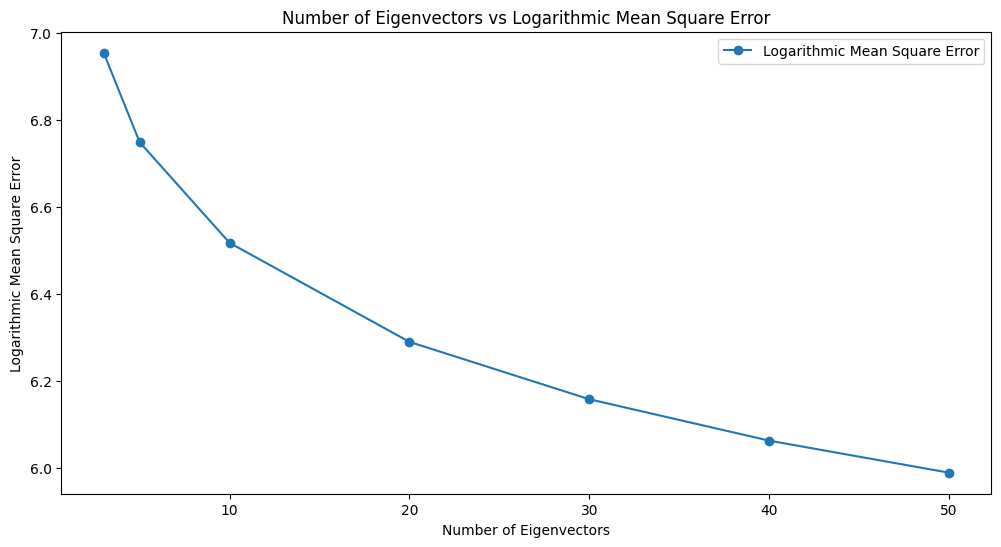

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(components, np.log(1 + np.array(mse)), marker='o', label='Logarithmic Mean Square Error')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Logarithmic Mean Square Error')
plt.title('Number of Eigenvectors vs Logarithmic Mean Square Error')
plt.legend()
plt.show()